In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm

# Recap - Gaussian and CLT 

## Purchase time

The average time taken for customers to complete a purchase is 4 minutes with a standard deviation of 1 minute. Find the probability that a randomly selected customer will complete a purchase within 6 minutes? Assume Gaussian

In [6]:
norm.cdf((6 - 4) / (1))

0.9772498680518208

What is the probability that the average time of the next 5 customers is less than 6 minutes?

In [7]:
norm.cdf((6 - 4) / (1/np.sqrt(5)))

0.9999961278917845

## Purchase amount

The average order value on an e-commerce website is 50, with a standard deviation of 5. What is the probability that a randomly selected order will have a value exceeding 60?

In [3]:
1 - norm.cdf((60-50)/(5))

0.02275013194817921

The average order value on an e-commerce website is 50, with a standard deviation of 5. What is the probability that the average of the next 3 orders exceeds 60?

In [8]:
1 - norm.cdf((60-50)/(5/np.sqrt(3)))

0.00026600275256960515

## Body temperature

Average body temperature has a mean of 98.6°F and a standard deviation of 0.5°F. What is the probability that a randomly chosen patient has a body temperature higher than 99.5°F?

In [5]:
1 - norm.cdf((99.5 - 98.6)/(0.5))

0.03593031911292488

# Confidence Interval using CLT

## Height example

The mean height of a sample of 100 adults was found to be 65 inches, with a standard deviation of 2.5 inches.

In [13]:
std_error = 2.5/np.sqrt(100)
std_error

0.25

In [10]:
z1 = norm.ppf(0.025) # z-multiplier
z1

-1.9599639845400545

In [12]:
z2 = norm.ppf(0.975)
z2

1.959963984540054

In [16]:
x1 = 65 + z1 * std_error
x1

64.51000900386498

In [17]:
x2 = 65 + z2 * std_error
x2

65.48999099613502

The 95% confidence interval --> [64.51, 65.49]

Compute the 90% confidence interval

In [18]:
65 + norm.ppf(0.05) * std_error

64.58878659326213

In [19]:
65 + norm.ppf(0.95) * std_error

65.41121340673787

## Recovery days

The sample mean recovery time of 100 patients after taking a drug was seen to be 10.5 days with a standard deviation of 2 days. Find the 95% confidence interval of the true mean.

In [20]:
std_error = 2/np.sqrt(100)
std_error

0.2

In [21]:
z1 = norm.ppf(0.025)
x1 = 10.5 + z1 * std_error
x1

10.108007203091988

In [22]:
z2 = norm.ppf(0.975)
x2 = 10.5 + z2 * std_error
x2

10.89199279690801

## Youtube watch hours

The mean Youtube watch time of a sample of 100 students was found to be 3.5 hours, with a standard deviation of 1 hour. Construct a 90% confidence interval for the true watch time.


In [23]:
def calc_CI(mean, std, N, prob):
    std_err = std / np.sqrt(N)
    print("SE ", std_err)
    slice = (1 - (prob/100))/2
    print("slice ", slice)
    z1 = norm.ppf(slice)
    print("z1 ", z1)
    z2 = norm.ppf(1-slice)
    print("z2 ", z2)
    x1 = mean + ( z1 * std_err)
    x2 = mean + ( z2 * std_err)
    return x1, x2

In [24]:
calc_CI(3.5, 1, 100, 90)

SE  0.1
slice  0.04999999999999999
z1  -1.6448536269514729
z2  1.6448536269514722


(3.3355146373048528, 3.6644853626951472)

In [27]:
norm.interval(confidence=0.90, loc = 3.5, scale = 1/np.sqrt(100))

(3.3355146373048528, 3.6644853626951472)

In [29]:
import scipy
scipy.__version__

'1.10.0'

# Confidence Interval using Bootstrap

In [30]:
survey_1 = [35, 36, 33, 37, 34, 35]
np.mean(survey_1)

35.0

In [31]:
survey_2 = [20, 37, 17, 50, 53, 33]
np.mean(survey_2)

35.0

Can we simulate more and more sets of samples like the ones above

Sample with replacement

In [76]:
n = 6
bootstrapped_samples = np.random.choice(survey_1, size=n)
np.mean(bootstrapped_samples)

35.0

In [83]:
bootstrapped_samples = np.random.choice(survey_2, size=n)
np.mean(bootstrapped_samples)

40.5

In [84]:
bootstrapped_means_survey_1 = []
for reps in range(10000):
    bootstrapped_samples = np.random.choice(survey_1, size=n)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_means_survey_1.append(bootstrapped_mean)

<AxesSubplot:ylabel='Count'>

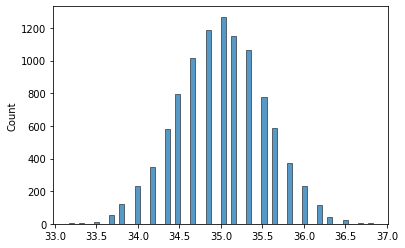

In [85]:
sns.histplot(bootstrapped_means_survey_1)

In [86]:
bootstrapped_means_survey_2 = []
for reps in range(10000):
    bootstrapped_samples = np.random.choice(survey_2, size=n)
    bootstrapped_mean = np.mean(bootstrapped_samples) # Replace by any statistic (median, percentile)
    bootstrapped_means_survey_2.append(bootstrapped_mean)

<AxesSubplot:ylabel='Count'>

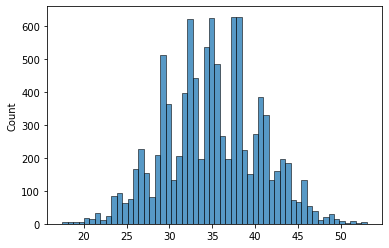

In [87]:
sns.histplot(bootstrapped_means_survey_2)

In [88]:
len(bootstrapped_means_survey_1)

10000

In [90]:
x1 = np.percentile(bootstrapped_means_survey_1, 2.5)
x1

34.0

In [91]:
x2 = np.percentile(bootstrapped_means_survey_1, 97.5)
x2

36.0

Confidence interval: (34.0, 36.0)

In [92]:
len(bootstrapped_means_survey_2)

10000

In [93]:
x1 = np.percentile(bootstrapped_means_survey_2, 2.5)
x1

24.0

In [94]:
x2 = np.percentile(bootstrapped_means_survey_2, 97.5)
x2

46.0